![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### Análisis de la relevancia de las nuevas ediciones en la salud del formato Commander en MtG

In [1]:
#Escribe el título del proyecto en Markdown
titulo = "Análisis de la relevancia de las nuevas ediciones en la salud del formato Commander en MtG"

### TEMA

In [2]:
# Describe brevemente el tema del proyecto en Markdown
tema = "Mediante el análisis de las cartas de cada mazo por edición, concluir si las cartas de ediciones más recientes son capaces" \
"de encontrar hueco entre las que llevan ya décadas asentadas o sustituírlas."

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Deberás tener más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

In [3]:
# Escribe tu hipótesis principal en Markdown
hipotesis_1 = "¿Hay cartas de las últimas ediciones entre las populares de las últimas semanas/años?"

In [4]:
# Escribe más hipótesis si las hubiera en Markdown
hipotesis_2 = "¿Los mazos van añadiendo cartas nuevas a su lista?"
hipotesis_3 = "¿Los mazos competitivos se actualizan con las cartas nuevas?"
hipotesis_4 = "Ratio de cartas usadas por cartas publicadas en la edición"
# hipotesis_5 = ""
# ...


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src import edhrec_requests as edh

In [2]:
# Esta es la base de datos de cartas de la cual sacaré los sets y cuando se publicaron.
df_1 = pd.read_csv("cartas_limpiadas.csv")
fuente_1 = "https://api.scryfall.com/bulk-data"
#Estos son directamente fuentes de las cuales copiaré las listas de cartas, procesaré y luego usaré para el análisis.
df_2 = edh.load_decks_from_folder2("mazos/kinnan")
fuente_2 = "https://edhrec.com/"
df_3 = pd.DataFrame()
fuente_3 = "https://moxfield.com/"
df_4 = pd.DataFrame()
fuente_5 = "https://edhtop16.com/"
#Saco los datos en un txt y luego los proceso para volverlos un df


Muestra mediante un head() los principales datasets con los que vas a trabajar

In [3]:
# Primer dataset
df_1.head()

,name,type_line,set,set_name,released_at,rarity,reprint,edhrec_rank,legalities,cmc,eur,release_year
0,Jade Statue,Artifact,lea,Limited Edition Alpha,1993-08-05,uncommon,False,26957.0,"{'standard': 'not_legal', 'future': 'not_legal...",4.0,232.12,1993
1,Plateau,Land — Mountain Plains,lea,Limited Edition Alpha,1993-08-05,rare,False,478.0,"{'standard': 'not_legal', 'future': 'not_legal...",0.0,3273.87,1993
2,Disintegrate,Sorcery,lea,Limited Edition Alpha,1993-08-05,common,False,14350.0,"{'standard': 'not_legal', 'future': 'not_legal...",1.0,16.08,1993
3,White Ward,Enchantment — Aura,lea,Limited Edition Alpha,1993-08-05,uncommon,False,23321.0,"{'standard': 'not_legal', 'future': 'not_legal...",1.0,35.67,1993
4,Sinkhole,Sorcery,lea,Limited Edition Alpha,1993-08-05,common,False,16502.0,"{'standard': 'not_legal', 'future': 'not_legal...",2.0,83.90,1993


In [4]:
# Siguiente dataset...
df_2.head()

,Deck Name,Card Name
0,"1 Kinnan, Bonder Prodigy",Ancient Tomb
1,"1 Kinnan, Bonder Prodigy",Arcane Signet
2,"1 Kinnan, Bonder Prodigy",Archdruid's Charm
3,"1 Kinnan, Bonder Prodigy",Basalt Monolith
4,"1 Kinnan, Bonder Prodigy",Birds of Paradise


In [5]:
df_2 = edh.añadir_columnas_relevantes(df_1, df_2)

e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\edhrec_requests.py:143: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Land' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "type_line"] = match.iloc[0]["type_line"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\edhrec_requests.py:144: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'tmp' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.at[i, "set"] = match.iloc[0]["set"]
e:\AreaTrabajo\REPO_PRUEBA\Itsazain_Bilbao_EDA\src\edhrec_requests.py:145: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1997-10-14' has dtype incompatible with float64, please explicitly cast to a compatible dtype

In [6]:
df_2

,Deck Name,Card Name,type_line,set,released_at,release_year,edhrec_rank
0,"1 Kinnan, Bonder Prodigy",Ancient Tomb,Land,tmp,1997-10-14,1997.0,57.0
1,"1 Kinnan, Bonder Prodigy",Arcane Signet,Artifact,eld,2019-10-04,2019.0,3.0
2,"1 Kinnan, Bonder Prodigy",Archdruid's Charm,Instant,pmkm,2024-02-09,2024.0,848.0
3,"1 Kinnan, Bonder Prodigy",Basalt Monolith,Artifact,lea,1993-08-05,1993.0,506.0
4,"1 Kinnan, Bonder Prodigy",Birds of Paradise,Creature — Bird,lea,1993-08-05,1993.0,38.0
...,...,...,...,...,...,...,...
1093,"1 Kinnan, Bonder Prodigy",Thorn Mammoth,Creature — Elephant,eld,2019-10-04,2019.0,4853.0
1094,"1 Kinnan, Bonder Prodigy",Trinisphere,Artifact,dst,2004-02-06,2004.0,3697.0
1095,"1 Kinnan, Bonder Prodigy",Veil of Summer,Instant,m20,2019-07-12,2019.0,492.0
1096,"1 Kinnan, Bonder Prodigy",Verity Circle,Enchantment,rna,2019-01-25,2019.0,3543.0


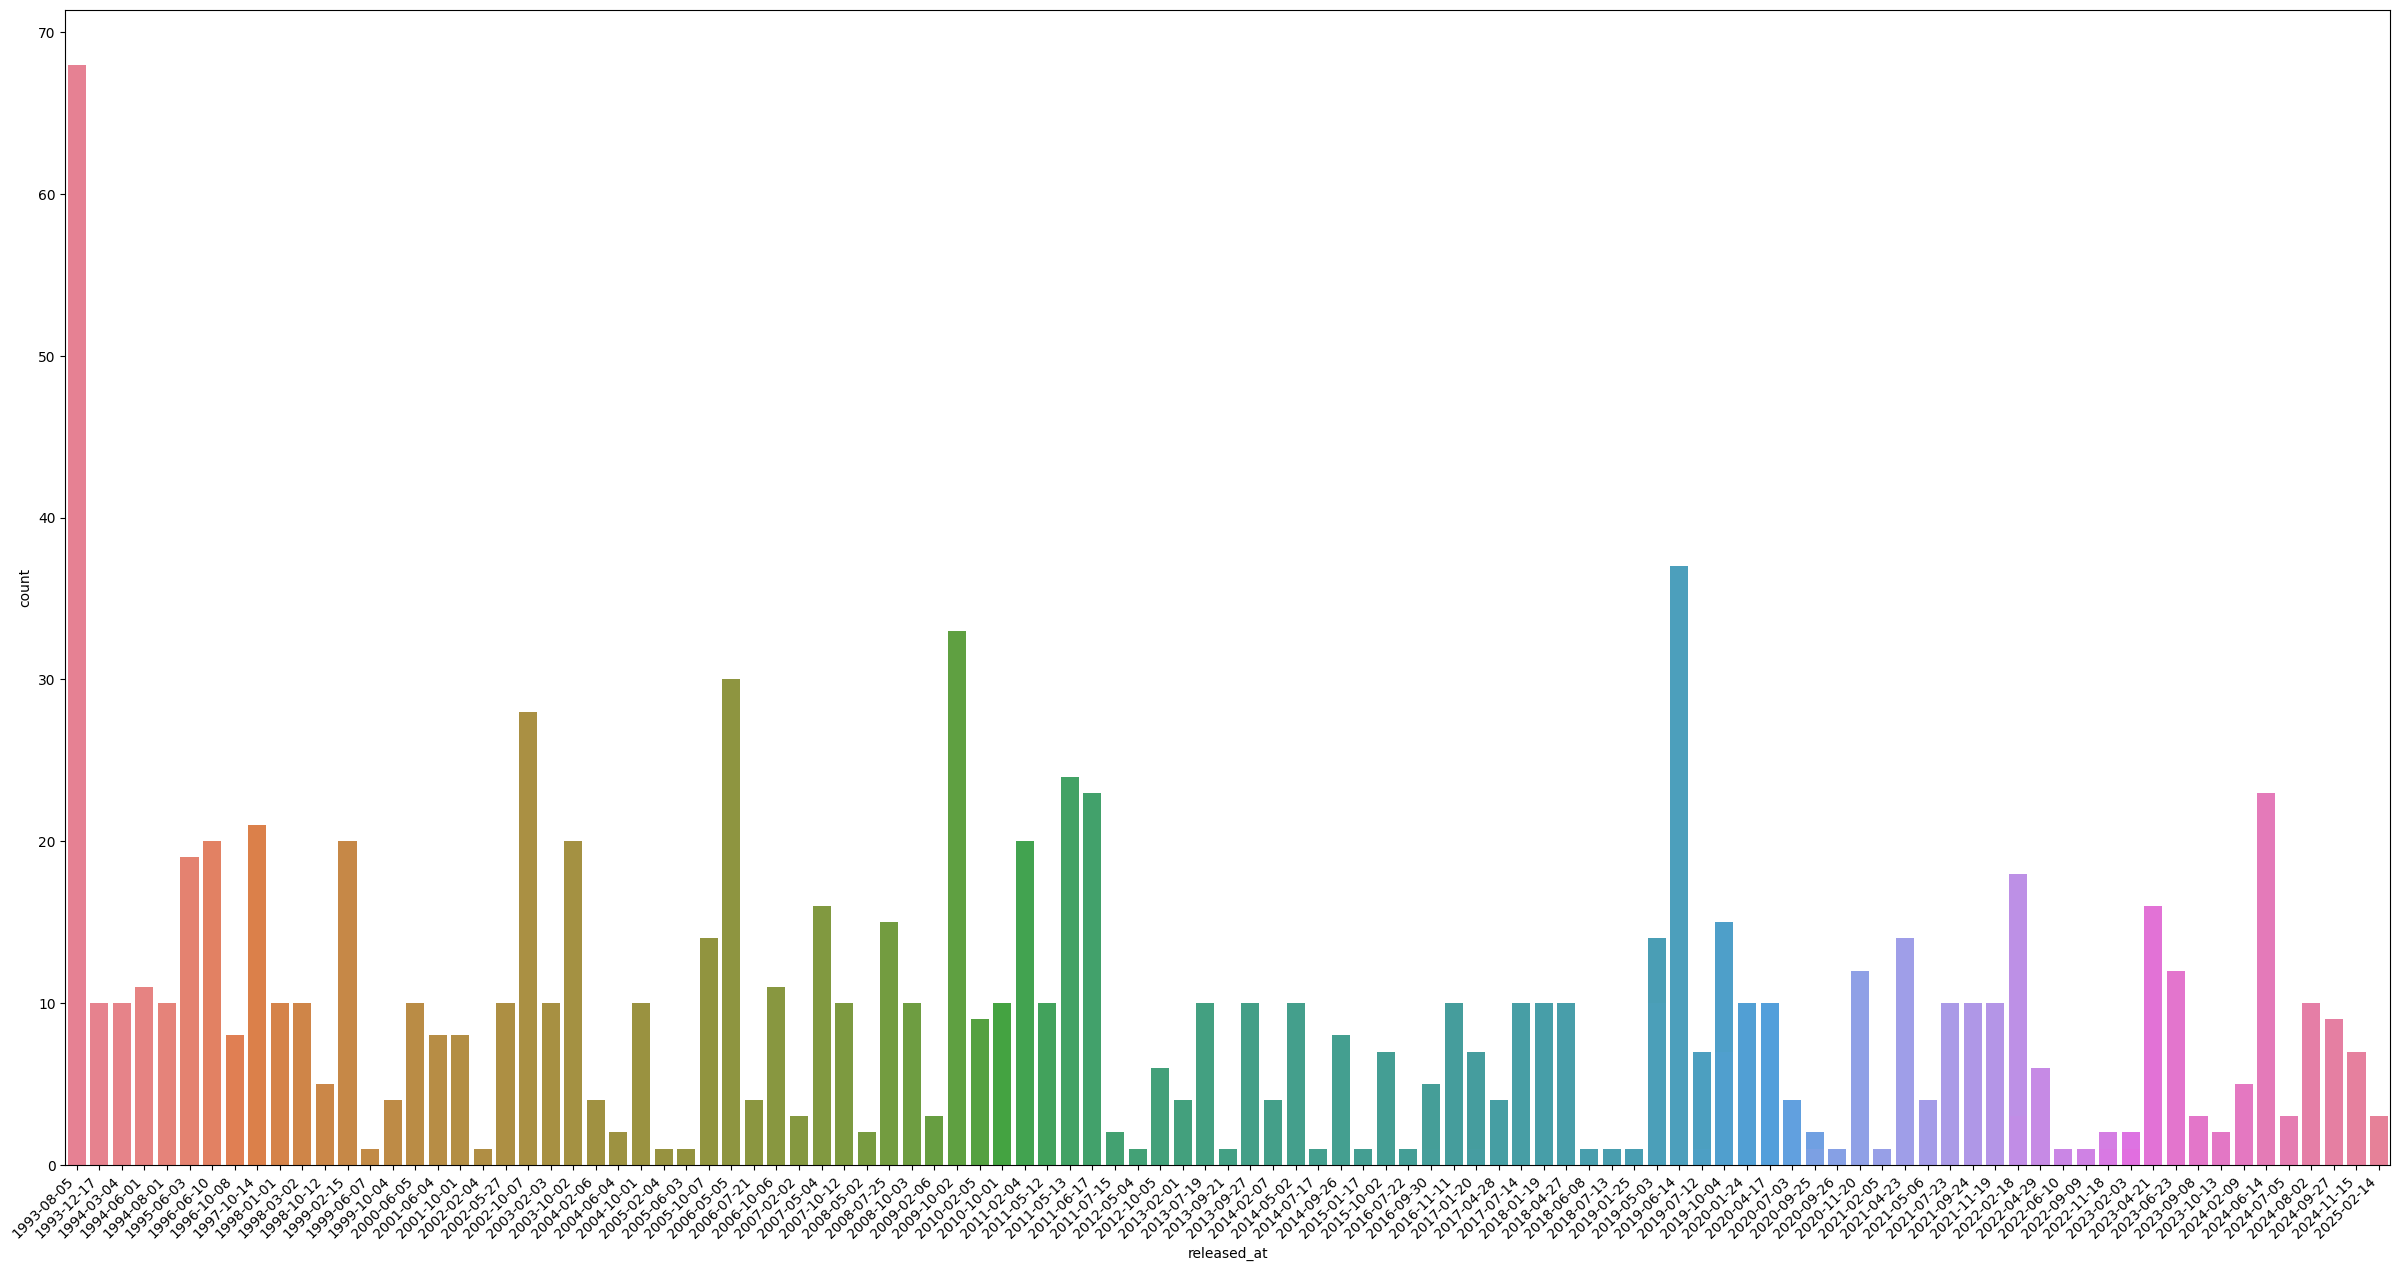

In [20]:
#Prueba 1 de visualización

set_counts = df_2.groupby(["set", "released_at"]).size().reset_index(name="count").sort_values(by="released_at")
plt.figure(figsize=(30,15))
sns.barplot(data=set_counts, x="released_at", y="count", hue="set", dodge=False, legend=False)
plt.xticks(rotation = 45, fontsize=10, ha="right", position=(0,0));


In [10]:
df_visu2 = df_2.copy()

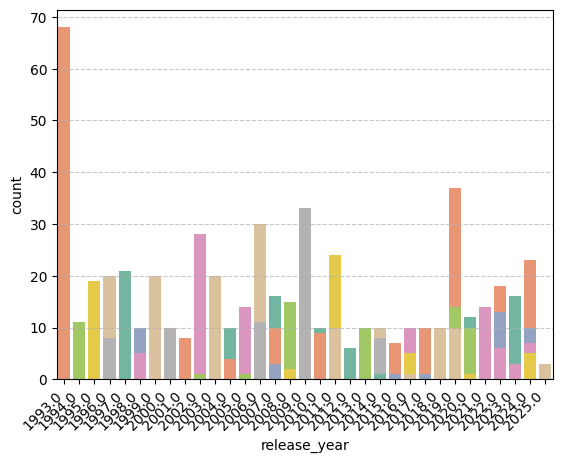

In [18]:
#Prueba 2 de Visualización

df_por_years = df_visu2.groupby(["release_year", "set"]).size().reset_index(name="count")

sns.barplot(data=df_por_years, x="release_year", y="count", hue="set", dodge=False, palette="Set2", legend=False)

plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")

plt.show();